In [87]:
import time
import matplotlib.pyplot as plt
from collections import Counter

# Define the decorator
def execution_time_logger(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        #print(f"{func.__name__} took {execution_time:.6f} seconds to execute")
        return execution_time
    return wrapper

# Apply the decorator to the word_count function
@execution_time_logger
def word_count_dict(text):
    words = text.split()
    word_counts = {}
    for word in words:
        word = word.strip(".,!?").lower()
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts

@execution_time_logger
def word_count_Counter(text):
    # Split the text into words using whitespace as a delimiter
    words = text.split()

    # Use Counter to count the appearances of each word
    word_counts = Counter(words)

    return word_counts



In [88]:
with open("shakespeare.txt", 'r', encoding='utf-8') as file:
    text = file.read()

In [89]:
len(text)

5458198

In [90]:
result = word_count_Counter(text)
print(result)

0.22456908226013184


In [93]:
result = word_count_dict(text)
print(result)

0.4569370746612549


A Counter is a specialized data structure optimized for counting elements, while a dictionary is a general-purpose key-value data structure with various use cases beyond counting.

In [92]:
dict_time = []
counter_time = []
for i in range(100):
    dict_time.append(word_count_dict(text))
    counter_time.append(word_count_Counter(text))

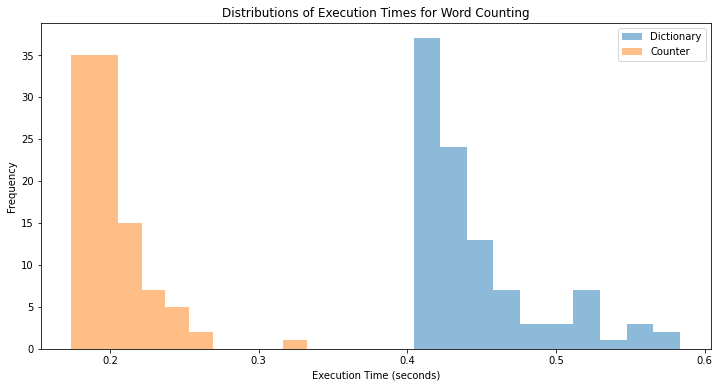

In [95]:
# Plot the distributions of execution times
plt.figure(figsize=(12, 6))
plt.hist(dict_time, alpha=0.5, label='Dictionary')
plt.hist(counter_time, alpha=0.5, label='Counter')
plt.xlabel('Execution Time (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distributions of Execution Times for Word Counting')
plt.show()